In [1]:
#Name:Priya Suresh Aher
#TASK 5 :Exploratory Data Analysis (EDA) on Titanic Dataset

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)

In [34]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape


(891, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Fill missing values safely
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin only if it exists
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

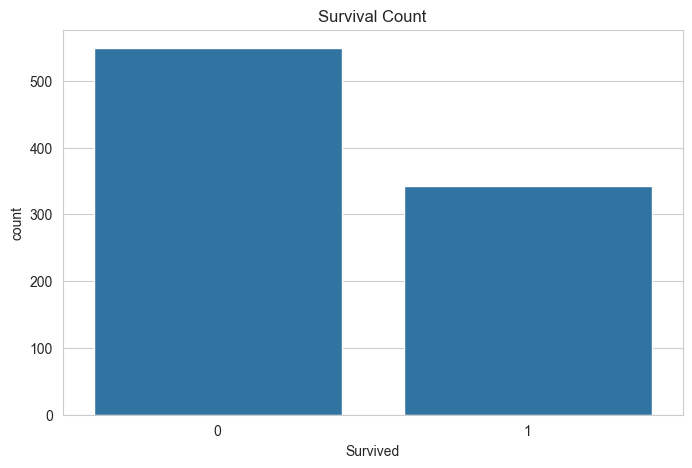

In [11]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


In [25]:
#observation:
#The number of passengers who did not survive is higher than those who survived. This indicates that survival rate was less than 50% during the disaster.

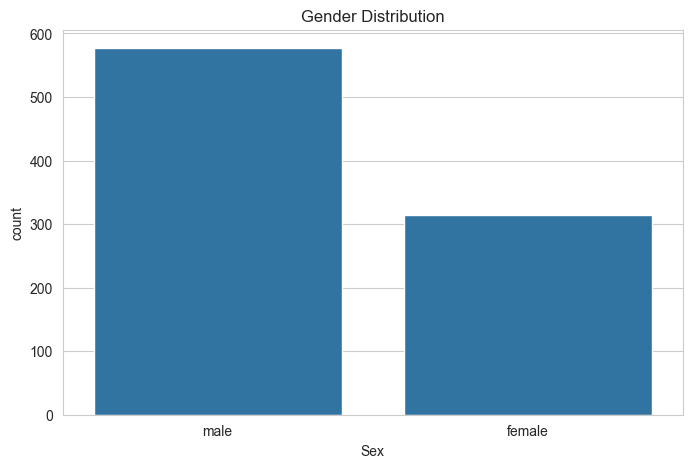

In [26]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


In [27]:
#Observation:
#Male passengers were significantly more than female passengers on board the Titanic.

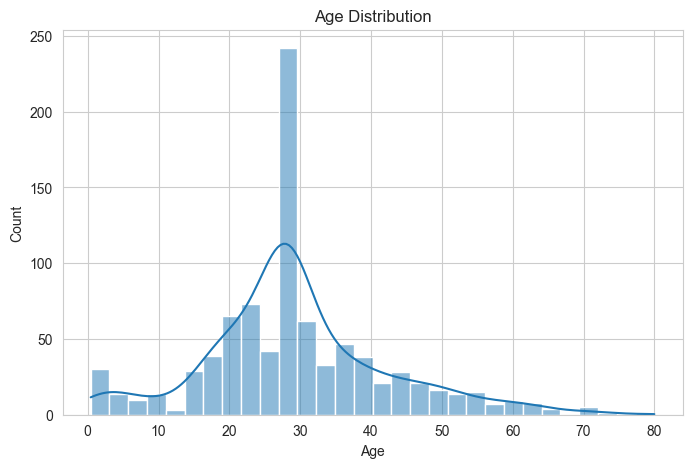

In [13]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


In [28]:
#Observation
#Most passengers were between the age group of 20–40 years. The age distribution appears slightly right-skewed.

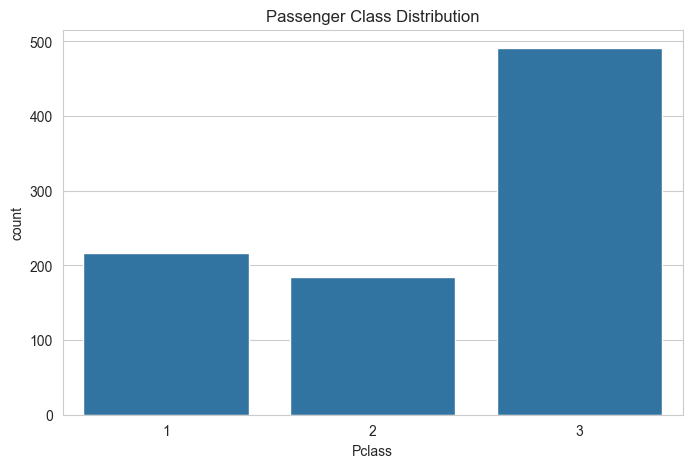

In [14]:
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()


In [29]:
#observation:
#Majority of passengers belonged to the 3rd class, followed by 1st and 2nd class

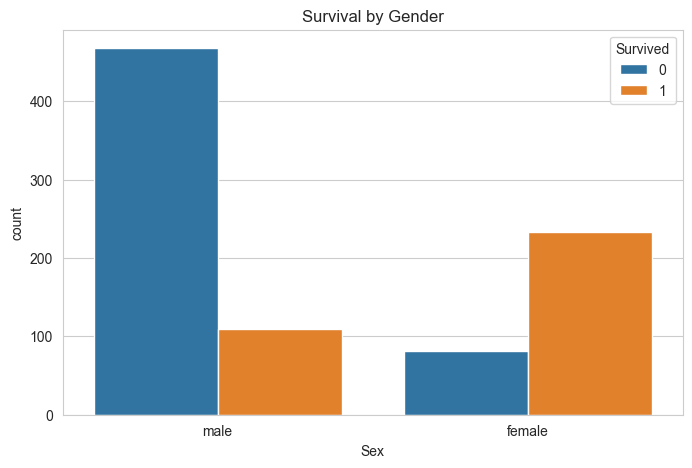

In [15]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


In [30]:
#Observation:
#Female passengers had a much higher survival rate compared to male passengers. This suggests that priority was given to women during rescue operations.

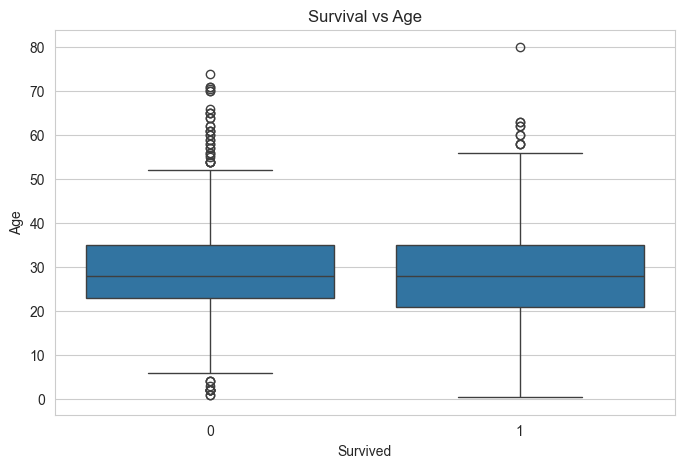

In [16]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Survival vs Age")
plt.show()


In [ ]:
#Observation:
#1st class passengers had the highest survival rate, while 3rd class passengers had the lowest. This indicates that socio-economic status influenced survival chances.

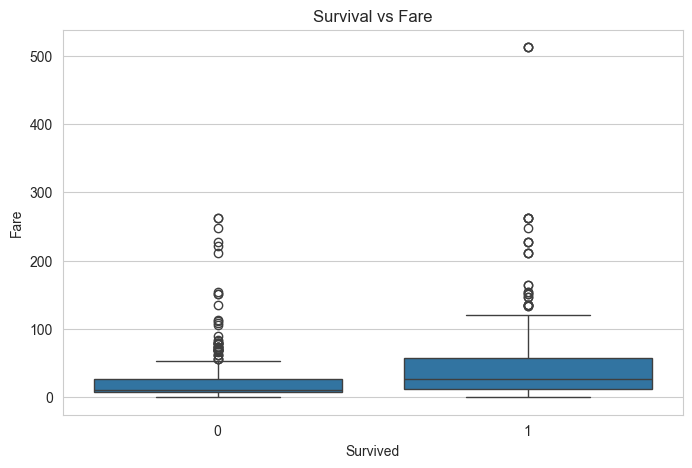

In [17]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Survival vs Fare")
plt.show()


In [31]:
#Observation:
#Younger passengers appear to have slightly better survival chances compared to older passengers.

In [18]:
df.groupby('Sex')['Survived'].mean()
df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [32]:
#Observation:
#Passengers who paid higher fares had better survival probability, indicating that wealthier passengers had more access to safety measures.

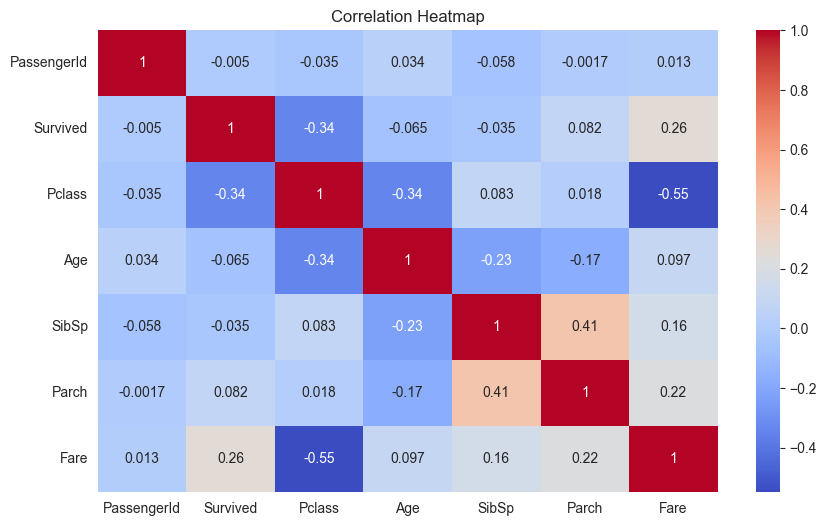

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Observation:
#Fare shows positive correlation with survival, whereas Passenger Class (Pclass) shows negative correlation with survival. Age has weak correlation with survival.

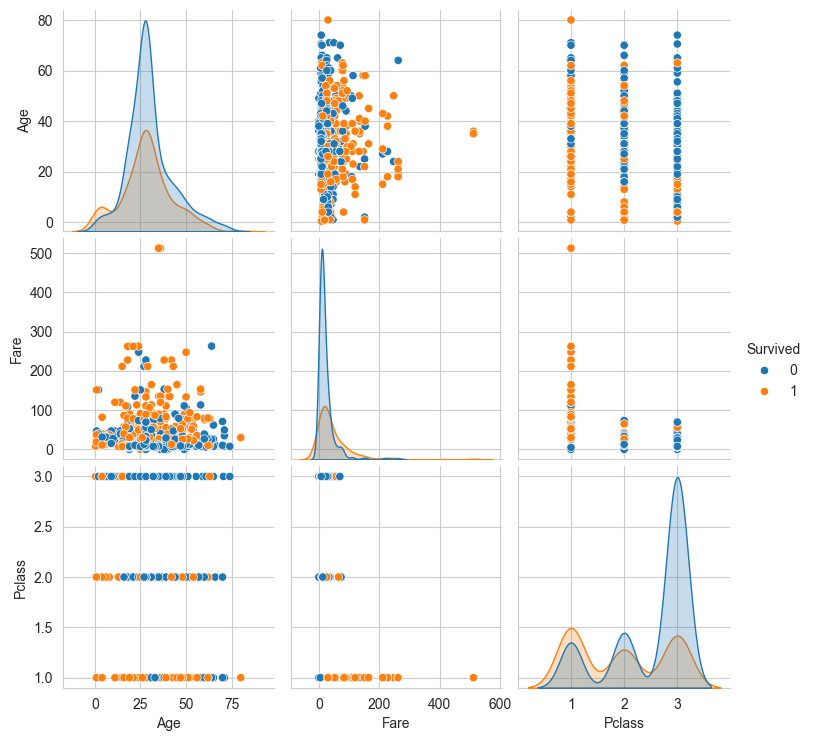

In [20]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()


In [ ]:
#Observation:
#Passengers with small to medium family sizes had better survival chances compared to those traveling alone or in very large families.

In [21]:
df[['Age','Fare']].skew()


Age     0.510245
Fare    4.787317
dtype: float64

In [ ]:
#Exploratory Data Analysis helped uncover meaningful patterns and relationships affecting passenger survival. These insights can be used to build predictive machine learning models.